# Учебный проект: "Разработка стратегии взаимодействия с клиентами на основе алгоритмов machine learning"

> # Цель:
- Проведение анализа при помощи алгоритмов машинного обучения и подготовка плана по действий по удержанию клиентов

> # Задачи:
- Импортировать необходимые библиотеки,
- Импортировать и прочитать датасет,
- Провести предобработку датасета и исследовательский анализ данных (EDA),
- Сформулировать промежуточные выводы,
- Построить модель прогнозирования оттока клиентов,
- Сформулировать промежуточные выводы,
- Сформировать кластеризацию клиентов,
- Сформулировать промежуточные выводы,
- Сформулировать общие выводы и выдвинуть базовые рекомендации по работе с клиентами

# Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='4'>Вывод результатов импорта</a>
- <a id='8'>Вывод функции для проверки дубликатов и пропусков</a>
- <a id='9'>Применение метода .describe()</a>
- <a id='10'>Исследование средних значений в группах</a>
- <a id='13'>Вывод гистограмм "Распределение признаков"</a>
- <a id='14'>Вывод матрицы корреляции</a>
- <a id='15'>Промежуточные выводы</a>
- <a id='15'>Формирование модели прогнозирования оттока клиентов</a>
- <a id='22'>Промежуточные выводы</a>
- <a id='26'>Формирование кластеров клиентов</a>
- <a id='31'>Вывод гистограмм "Распределение признаков по кластерам"</a>
- <a id='32'>Рассчет доли оттока по кластерам</a>
- <a id='32'>Промежуточные выводы</a>
- <a id='32'>Общие выводы. Рекомендации</a>

____

## Импорт библиотек. Исследовательский анализ данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings

In [2]:
# По старой доброй традиции заранее избавляемся от возможных предупреждений
warnings.filterwarnings('ignore')

In [3]:
# Импортируем датасет
df = pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/gym_churn.csv')

In [4]:
# Выводим результат импорта
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2288,0,1,0,0,1,6,1,30,41.646801,5.0,2,1.936667,0.558111,1
3302,1,1,1,1,1,12,0,32,143.585107,8.0,5,0.629896,0.682816,0
892,0,1,1,1,0,12,1,31,47.107327,11.0,1,1.567930,1.729095,0
2858,1,1,1,1,1,6,0,26,241.885956,4.0,3,1.477087,1.552703,0
1903,0,1,1,1,1,12,1,30,195.563280,12.0,4,1.830852,2.016738,0
1849,0,1,1,1,1,1,1,26,183.078280,1.0,8,0.948815,0.989222,0
355,0,1,1,1,1,1,1,30,83.809056,1.0,9,0.000000,0.000000,0
2483,0,1,1,1,1,6,0,38,41.287630,6.0,9,3.354541,3.207609,0
797,0,1,0,0,1,1,1,27,88.267044,1.0,3,1.360636,1.296916,0
1010,0,1,1,1,1,12,0,32,181.418851,12.0,3,1.994933,1.918648,0


In [5]:
# Изменяем регистр в названиях столбцов
df.columns=df.columns.str.lower()

In [6]:
# Проверяем результат
df.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1769,0,1,0,1,1,6,0,29,184.082697,6.0,3,2.171322,2.147964,0
3764,0,1,1,1,1,1,0,31,40.987163,1.0,9,1.791114,1.841029,0
3048,1,0,1,0,0,1,0,23,12.659007,1.0,1,1.433300,1.087635,1
2039,0,1,1,1,1,1,0,29,124.242741,1.0,4,0.988797,0.774151,0
3244,0,1,1,0,0,1,0,25,252.732771,1.0,0,1.016134,0.475981,1


In [7]:
# Используем модифицированную функцию из предыдущих проектов для вывода info(), проверки дубликатов и NaN
def info (dataframe):
    print (dataframe.info())
    print()
    print ('Количество duplicates:',dataframe.duplicated().sum())
    print()
    print('Количество NaN:')
    print(dataframe.isnull().sum())

In [8]:
# Запускаем функцию
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

<b>Датасет импортирован и прочитан. Названия столбцов приведены к нижнему регистру. Пропуски и дубликаты отсутствуют.</b>

___

In [9]:
# Применяем метод .describe()
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


<b>Анализ данных:</b>
- По полу посетители фитнес-центра распределены практически поровну,
- Подавляющее большинство клиентов либо живут, либо работают рядом с центром,
- Практически половина клиентов является сотрудниками компаний - партнеров,
- Треть клиентов воспользовалась акцией "приведи друга",
- Подавляющее большинство имеет контактный телефон,
- Средняя длительность абонемента - 4,68 месяцев,
- Чуть больше 40 процентов клиентов посещали групповые занятия,
- Средний возраст клиентов - 29 лет,
- На одном клиенте фитнес-центр зарабатывал 147 у.е. помимо стоимости абонемента,
- В среднем, до конца абонемента - 4,3 месяца, однако у большинства этот период составляет один месяц,
- В среднем, с момента первого обращения в центр проходит 4 месяца,  медианное время при этом - 3 месяца,
- Средние частоты посещений за неделю (за все время и за месяц) соответственно равны 1,88 и 1,77. <b>Можно предположить сильную корреляцию между этими параметрами...</b>,
- Отток в текущем месяце составил более четверти (27%), что, безусловно, является настораживающим фактом.


In [10]:
# Исследуем средние значения в группах "остался", "отток" методом .groupby()
df.groupby('churn').agg('mean').round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


<b>Анализ данных:</b>
Очевидно, что "отставшиеся" клиенты (0) демонстрируют более сильные связи с финтес-центрам по всем позициям, начиная с локации (живут и/или работают рядом) и заканчивая количеством посещений. Лишь два параметра идентичны для обеих групп: пол и наличие контактного телефона.

In [11]:
# Формируем две группы посетителей методом .loc: "left" - ушедшие, "stayed" - оставшиеся
left = df.loc[df['churn'] == 1]
stayed = df.loc[df['churn'] == 0]
print(left.shape[0])
print(stayed.shape[0])

1061
2939


In [12]:
# Используем еще одну функцию из предыдущих проектов (с модификациями и дополнениями) для вывода гистограмм
def hists(data, column, labels=None):
    fig = plt.figure(figsize=(25, 30))
    
    unique_values = data[column].unique()
    
    fig.suptitle('Распределение признаков/ Распределение признаков по кластерам', y=0.92, fontsize=30) 
    
    for i, el in enumerate(data.columns.drop(column)):
        ax = fig.add_subplot(5,3,i + 1)
        
        for val in unique_values:    
            sns.distplot(
                df[df[column] == val][el],
                label=val,
                kde=False,
                ax=ax
            )   
    ax_handles, ax_labels = ax.get_legend_handles_labels()
    if labels: 
        ax_labels = (labels[el] for el in ax_labels)
    handles = {label: handle for handle, label in zip(ax_handles, ax_labels)}

    fig.legend(
        handles.values(), 
        handles.keys(), 
        ncol=len(unique_values), 
        loc = 'upper center', 
        bbox_to_anchor=(0.5, 0.9), 
        prop={'size': 17}
    )
    plt.show()

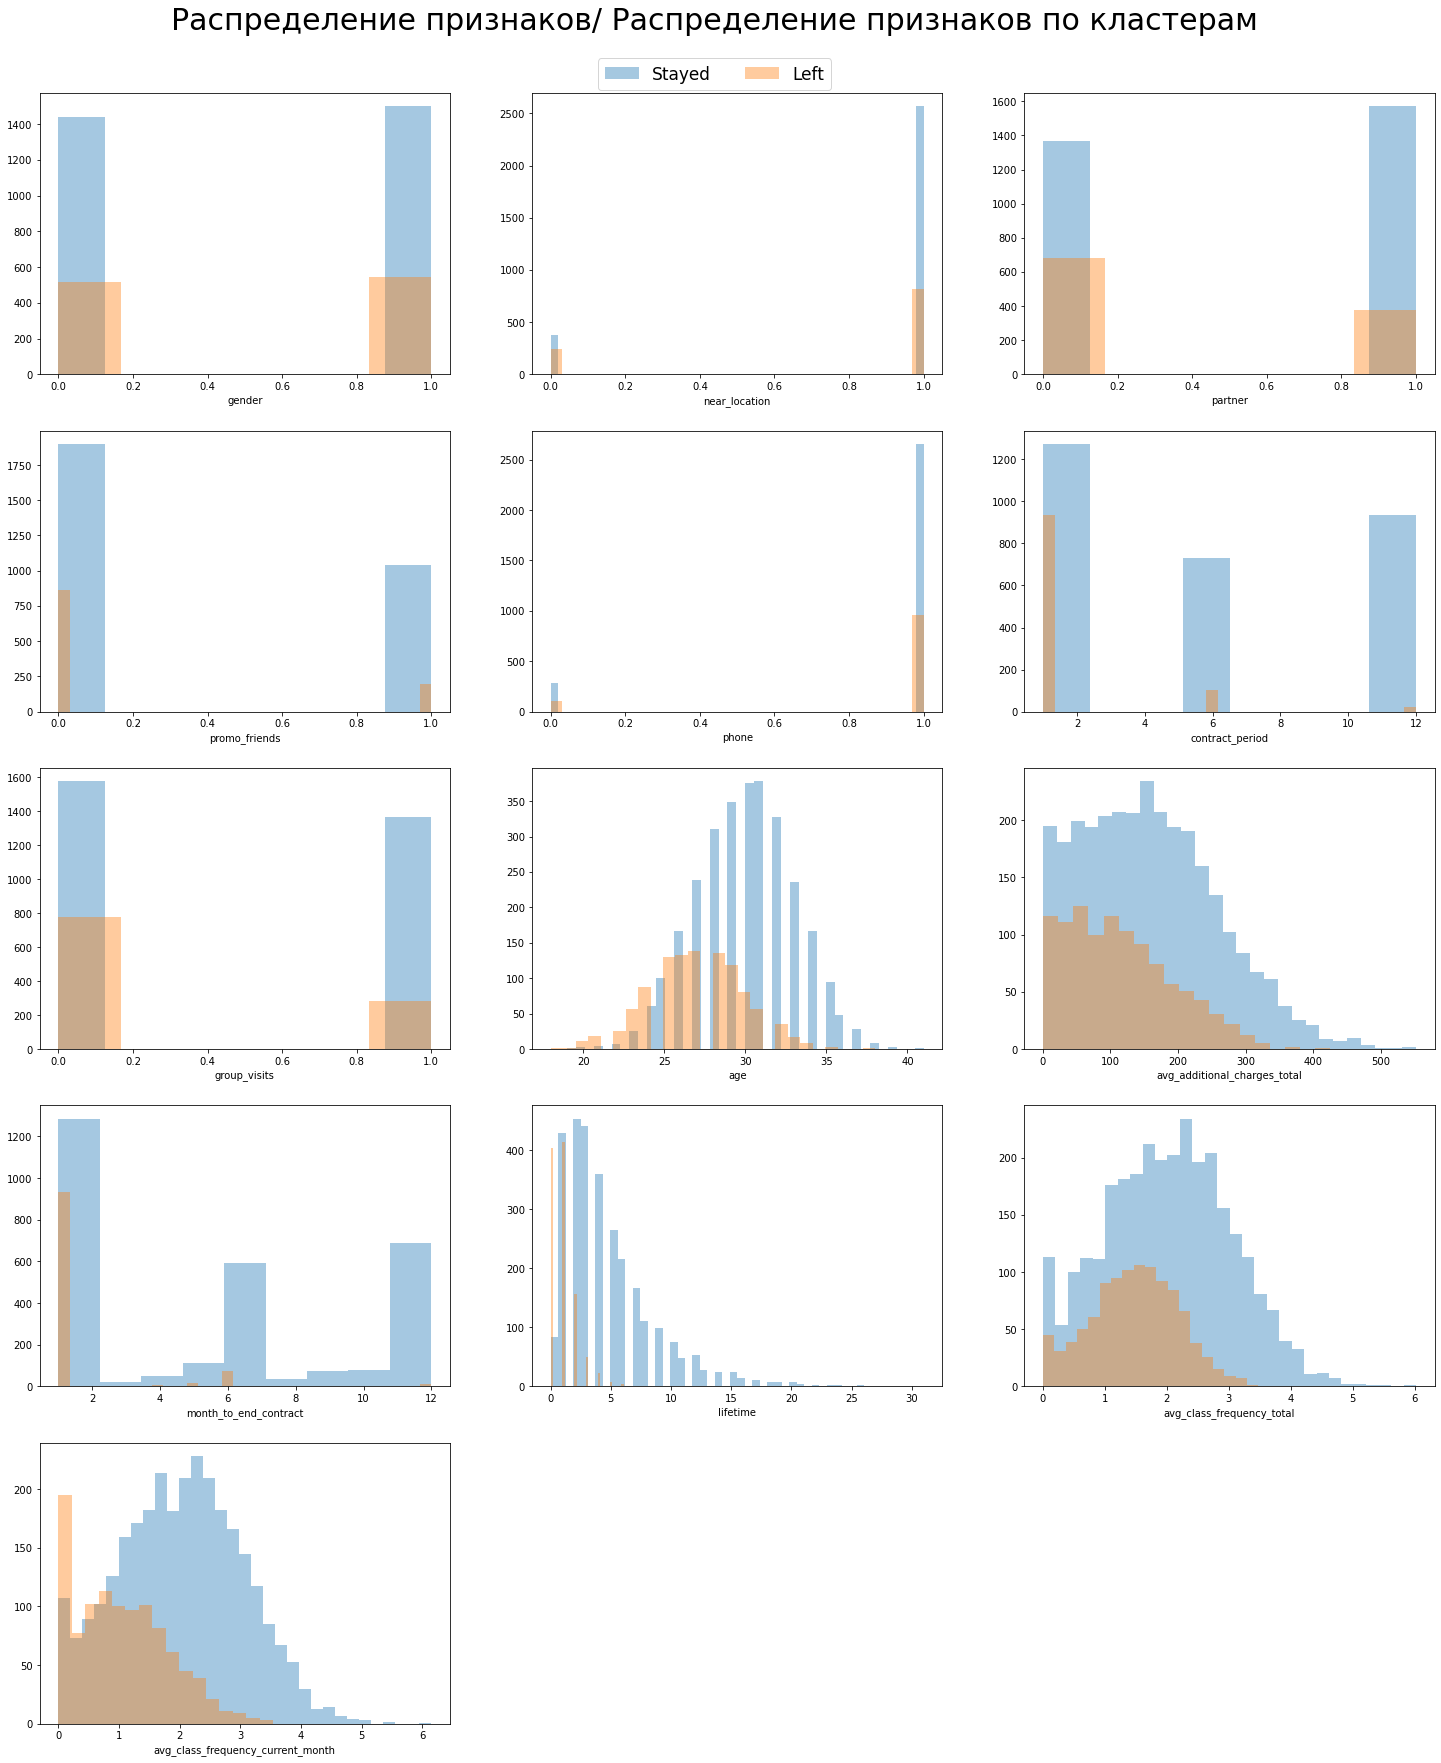

In [13]:
# Выводим гистограммы
hists(df, 'churn', {'0': 'Stayed', '1': 'Left'})

<b>Анализ данных:</b>
- gender - распределение равномерное,
- near_Location - большинство клиентов живут/ работают недалеко от центра, среди тех, кто живет/ работает далеко, закономерно больше отток,
- partner - клиенты, не участвовавшие в партнерской программе уходят чаще,
- promo_friends - среди тех, кто не использовал промо, ушедших больше,
- phone - наличие контактного телефона не останаливает клиента от того, чтобы прекратить заниматься,
- contract_period - короткий абонемент - больше отток,
- group_visits - клиенты, не посещающие групповые программы, уходят чаще,
- age - остаются те, кому за 30, уходят те, кому в районе 27,
- avg_additional_charges_total - суммарная выручка от других услуг у оставшихся клиентов (до 400 у.е.); у ушедших - в районе 300 у.е.,
- month_to_end_contract - практически полное совпадение с длительностью абонемента,
- lifetime - те, кто потом уходит и залом начинает пользоваться позже (подсознательно уже решив, что заниматься он/она не будет),
- avg_class_frequency_total - клиенты, попадающие в отток, значительно реже посещают зал,
- avg_class_frequency_current_month - опять же, те кто собирался бросить занятия, снижают частоту появлений в зале до того, как прекращают ходить полностью (работает банальная человеческая психология).

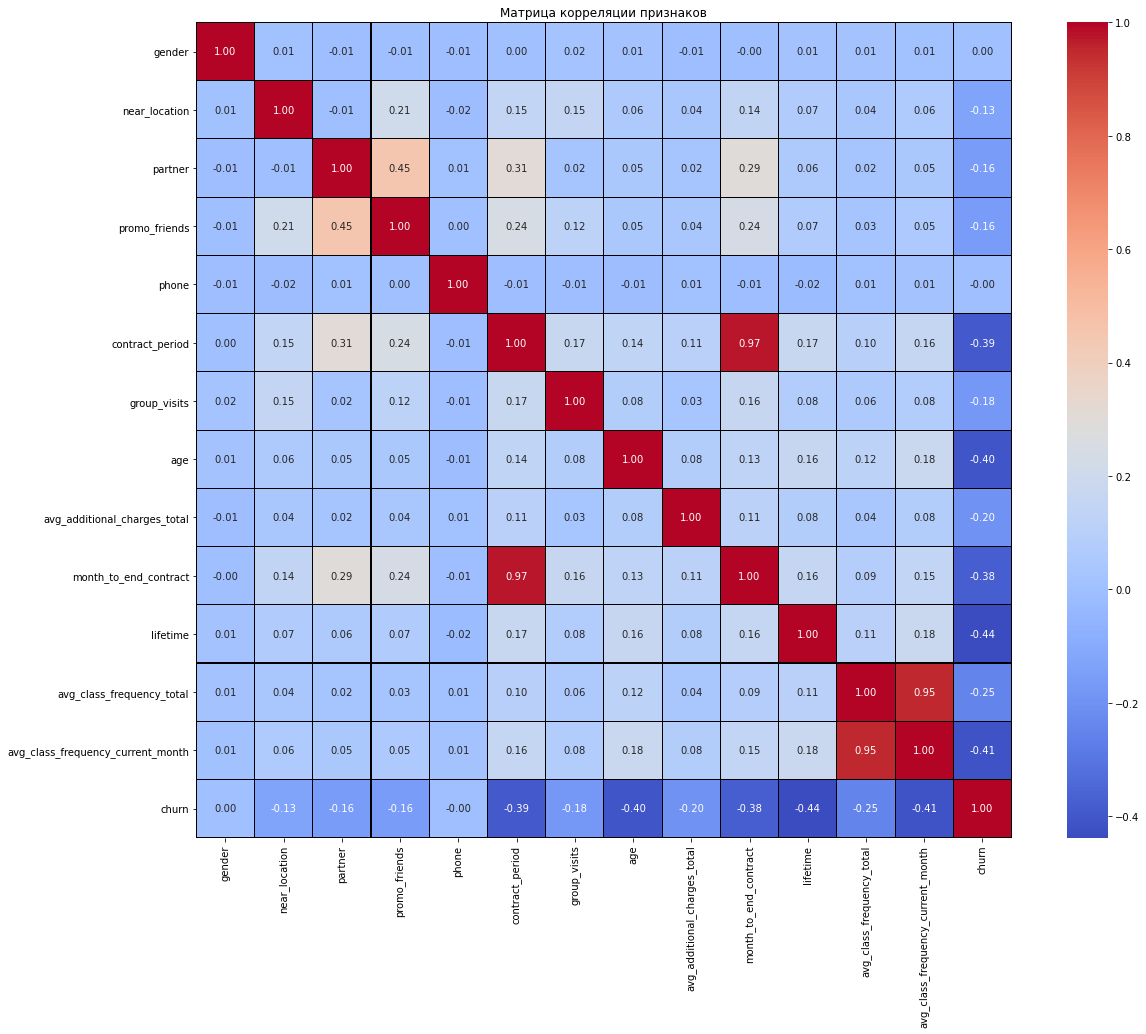

In [14]:
# Формируем матрицу корреляции
cm = df.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot = True, square=True, fmt = '0.2f', linewidths=.2,linecolor='black', cmap='coolwarm')
plt.title('Матрица корреляции признаков')
plt.show()

<b>Анализ данных:</b>
Наблюдается высока корреляция в парах признаков:
- Contract_period - Month_to_end_contract (0,97). Недавнее приобретение абонементов.
- Avg_class_frequency_total - Avg_class_frequency_current_month (0,95). Частота появлени в зале.

## Промежуточные выводы:

<b>Предобработка:</b>
- Импортирован и прочитан датасет,
- Проведено исследование датасета на предмет пропусков и дубликатов,
- Названия столбцов приведены к нижнему регистру.

<b>Закономерности, выявленные после проведения EDA:</b>

- Если клиент живет/ работает далеко от центра, вероятность оттока повышается,
- Если клиент не участвует в партнерских программах и промо-акциях, вероятность оттока повышается,
- Если клиент не посещает групповые занятия, вероятность оттока повышается (в реальности, это выглядит довольно странно, кстати...),
- Если клиент покупает краткосрочный абонемент и/или редко посещает зал, вероятность оттока повышается.

___

## Формирование модели прогнозирования оттока клиентов

In [15]:
# Формируем переменные: с признаками и целевую
X = df.drop('churn', axis=1)
y = df['churn']

In [16]:
# Делим выборку на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Проводим стандартизацию
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
# Готовим основу для функции
models = [LogisticRegression, RandomForestClassifier]

In [20]:
# Пишем функцию
def res_model(m, X_train, X_test, y_train, y_test):
    model = m(random_state=0)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test ,prediction)))
    print('Precision: {:.2f}'.format(precision_score(y_test ,prediction)))
    print('Recall: {:.2f}'.format(recall_score(y_test ,prediction)))

In [21]:
# Выполняем функцию
for i in models:
    print(i)
    res_model(i, X_train, X_test, y_train, y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.91
Precision: 0.82
Recall: 0.80
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


### Промежуточные выводы:
Применение двух моделей ("Логистическая регрессия" и "Случайный лес") показало, что:
- Доля accuracy  у моделей примерно равна (0,91 против 0,92),
- Доля precision у регрессии - 0,82, а у случайного леса - 0, 84,
- Доля recall у регрессии - 0,80, а у случайного леса - 0,82.

В общем, можно сказать, что обе модели примерно равны. Модель регрессии (на основании метрик) показала себя чуть хуже, однако, вполне вероятно, что при подборе параметров качество и той, и другой модели может возрасти...


___

## Формирование кластеров клиентов

In [22]:
# Проводим обязательную стандартизацию данных перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(df)

In [23]:
# Обучаем модель кластеризации на основании алгоритма K-Means
# Задаем количество кластеров; прогнозируем кластеры для наблюдений; сохраняем метки кластера
km = KMeans(n_clusters = 5,random_state=0)
labels = km.fit_predict(x_sc)
df['cluster_km'] = labels

In [24]:
# Формируем дендрограмму, задаем метод 'ward'
linked = linkage(x_sc, method = 'ward') 

<b><span style= color:red> Важно! При формировании дендрограммы я применяю truncate_mode='lastp', поскольку в противном случае дендрограмма строится чрезвычайно долго (по причине множества мелких кластеров).</span></b>

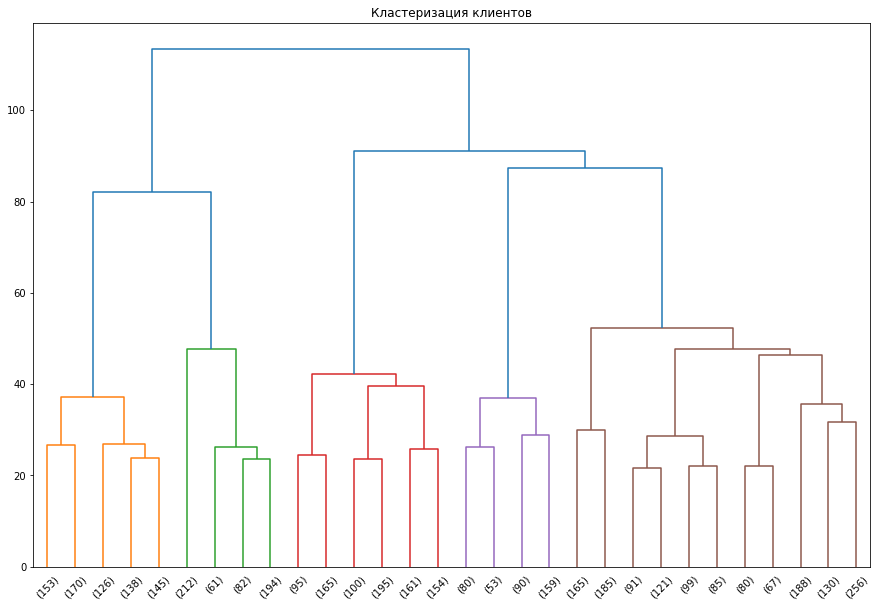

In [25]:
# Выводим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', leaf_rotation=45, truncate_mode='lastp')
plt.title ('Кластеризация клиентов')
plt.show()

In [26]:
# Выводим средние значения признаков по кластерам
df.drop('churn', axis=1).groupby('cluster_km').mean().round(2).T

cluster_km,0,1,2,3,4
gender,0.53,0.51,0.55,0.48,0.50
near_location,0.87,0.76,0.84,0.83,0.94
partner,0.47,0.34,0.37,0.46,0.77
promo_friends,0.31,0.18,0.21,0.26,0.56
phone,0.00,1.00,1.00,1.00,1.00
contract_period,4.82,1.57,2.69,2.75,11.20
group_visits,0.43,0.26,0.44,0.38,0.56
age,29.34,26.91,29.98,30.04,29.88
avg_additional_charges_total,144.52,114.99,161.30,151.14,162.67
month_to_end_contract,4.50,1.51,2.47,2.55,10.26


<b>Анализ данных:</b>
- <b>Кластер 1</b> суммарно демонстрирует самые низкие показатели по ряду ключевых параметров: contract_period, age, avg_additional_charges_total и lifetime, 
- <b>Кластер 0</b> показывает чуть более высокие показатели по данным параметрам,
- <b>Кластеры 2, 3 и 4</b> являются наиболее устойчивыми ("сильными") по данным показателям.

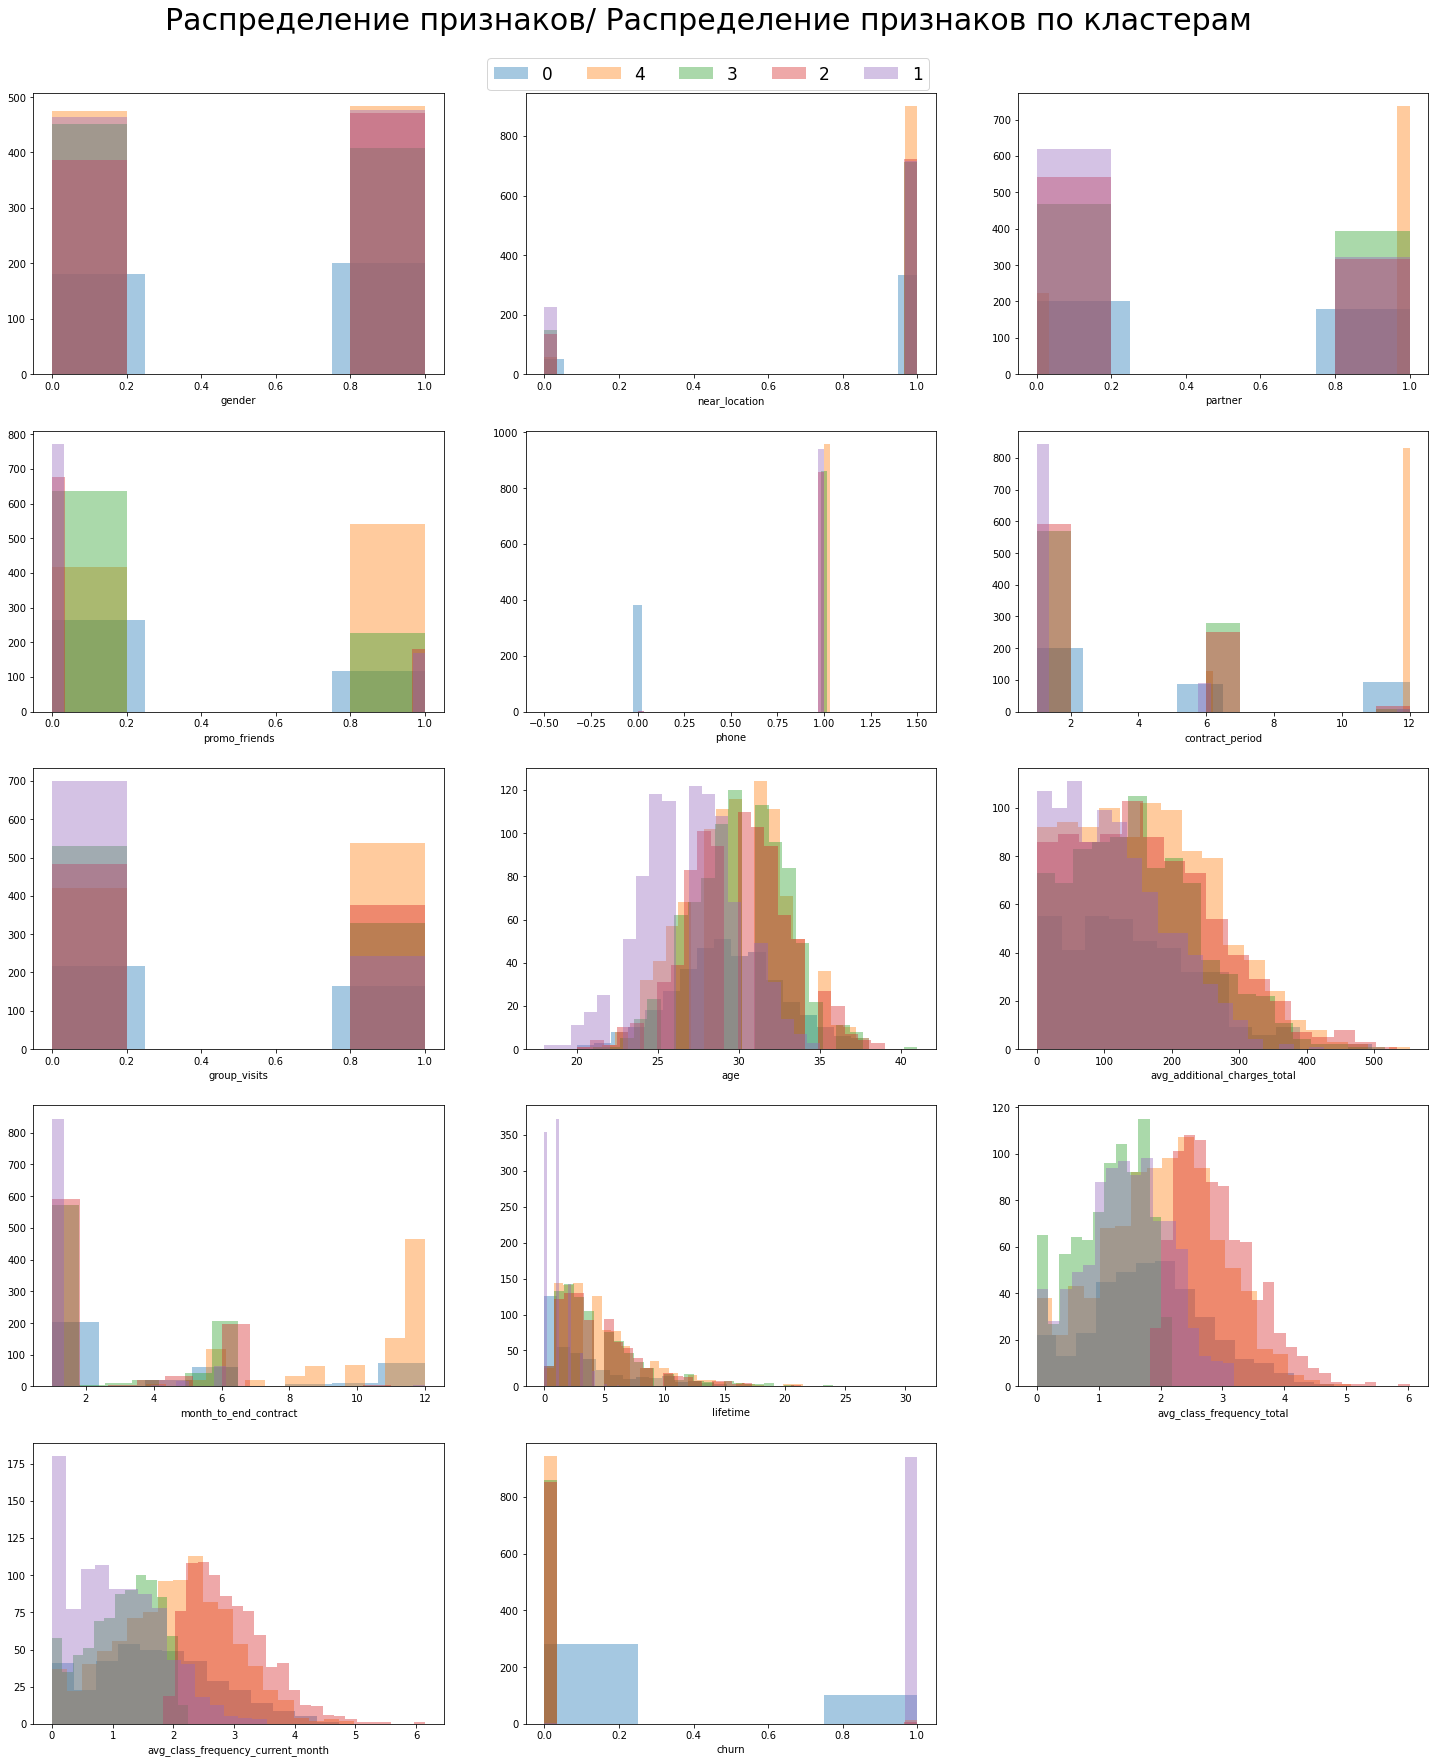

In [27]:
# Выведем гистограммы распределения признаков по кластерам
hists(df, 'cluster_km')

<b>Анализ данных:</b> Гистограммы распределения признаков по кластерам показывают, что первый и третий кластеры наиболее многочисленны, их значения чаще смещены вправо: это значит, что клиенты, составляющие данные кластеры старше, больше тратят на дополнительные услуги, чаще посещают зал.


In [28]:
# Рассчитываем долю оттока по кластерам методом .groupby()
df.groupby('cluster_km')['churn'].mean().round(2).reset_index()

,cluster_km,churn
0,0,0.26
1,1,1.00
2,2,0.01
3,3,0.00
4,4,0.02


<b>Анализ данных:</b> Доля оттока по второму кластеру составляет 1.0. Собственно говоря, все предыдущие данные указывали на то, что данный кластер является самым "слабым" и проблемным. На втором месте следует нулевой кластер с долей оттока клиентов 0,26.

## Промежуточные выводы:
- Для прогнозирования оттока клиентов в данном случае лучше подходит модель случайного леса. Однако, качество метрик двух испозованных моделей, в общем, совпадает,
- В результате кластеризации были получены пять кластеров,
- Анализ данных показал, что наиболее "слабым" кластером с максимальной долей оттока является кластер №1.
- Наиболее "сильные" кластерами с минимальными долями оттока являются кластеры 2, 3 и 4.

___

# Общие выводы. Рекомендации:
- На отток клиентов влияет, прежде всего, их собственная психология. Исследование показало, что, в основном, уходят молодые люди, купившие абонемент "попробовать". Как правило, такие клиенты нуждаются в дополнительной мотивации, поскольку, как известно, привычка формируется за 21 день...
- Для того, чтобы снизить отток клиентов стоит мотивировать их дополнительными услугами и/или скидками, входящими в "стартовый" пакет в первый месяц. Из таких услуг наиболее востребованными будут два-три БЕСПЛАТНЫХ занятия с тренером: большинство бросает заниматься в фитнес-центрах именно потому, что не понимают как правильно и безопасно выполнять те или иные упражнения.
- Вовлечение в групповые занятия также может способствовать удержанию клиентов, особенно, если эти группы формируются из числа коллег/друзей/ людей с общими интересами и задачами.
- Активное вовлечение клиентов в клубную жизнь, формирование ощущения причастности к общему делу через организацию конкурсов, внутриклубных соревнований, с помощью различной клубной атрибутики и т.п. также будет способствовать удержанию клиентуры и снижению оттока. 
- Безусловно, фактор близости к месту жительства/ работы играет существеннную роль, однако если в клубе интересно, весело и продуктивно, многие будут посещать его, несмотря на уделанность...